In [1]:
import warnings
warnings.filterwarnings ('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

from requests import get
from bs4 import BeautifulSoup
import os
import json
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import acquire
import prepare
from env import github_token

### Find Top Language Used - Done
### Scrape body of README.md - In Progress
### Put into DataFrame - Not Done at all

**Find readme languages**

**Functions to acquire data**

In [2]:
def make_dictionary():
    headers = {'user-agent': 'Codeup Bayes Instructor Example'}
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    return {'title': title,
            'body': body,
            'language': language
            }

In [3]:
#make_dictionary()

In [4]:
def get_links():
    url = 'https://github.com/trending'
    headers = {'User-Agent': 'Codeup Data Science Student'}
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    urls = []
    
    for h1 in soup.find_all('h1'):
        urls.append((re.sub(r'\s', '',h1.text)))
    urls.pop(0)
    return urls

In [5]:
get_links()

['marblexu/PythonPlantsVsZombies',
 'redox-os/orbtk',
 'getify/You-Dont-Know-JS',
 'saket/Press',
 'AIDungeon/AIDungeon',
 'bytefury/crater',
 'andrews1022/web-development-2020-course-list',
 'alyssaxuu/flowy',
 'infostreams/db',
 'HuaweiJoke/Huawei-Joke',
 'manchenkoff/skillbox-chat',
 'facebookresearch/VideoPose3D',
 'TheAlgorithms/Python',
 'karpathy/pytorch-normalizing-flows',
 'sdmg15/Best-websites-a-programmer-should-visit',
 'wuyouzhuguli/SpringAll',
 'Risk3sixty-Labs/geoapi',
 'kdn251/interviews',
 'google-research/ALBERT',
 'AobingJava/JavaFamily',
 'rclone/rclone',
 'CoatiSoftware/Sourcetrail',
 'serverless/serverless',
 'goldbergyoni/nodebestpractices',
 'banzaicloud/bank-vaults']

In [6]:
def get_urls():
    urls = ['https://github.com/collections/made-in-africa',
       'https://github.com/collections/web-games',
       'https://github.com/collections/probot-apps',
       'https://github.com/collections/social-impact',
       'https://github.com/collections/devops-tools',
       'https://github.com/collections/game-engines',
       'https://github.com/collections/hacking-minecraft',
       'https://github.com/collections/learn-to-code'
      ]
    
    output = []
    
    for url in urls:
         output.extend(get_links())
    return output

In [7]:
get_urls()

['marblexu/PythonPlantsVsZombies',
 'redox-os/orbtk',
 'getify/You-Dont-Know-JS',
 'saket/Press',
 'AIDungeon/AIDungeon',
 'bytefury/crater',
 'andrews1022/web-development-2020-course-list',
 'alyssaxuu/flowy',
 'infostreams/db',
 'HuaweiJoke/Huawei-Joke',
 'manchenkoff/skillbox-chat',
 'facebookresearch/VideoPose3D',
 'TheAlgorithms/Python',
 'karpathy/pytorch-normalizing-flows',
 'sdmg15/Best-websites-a-programmer-should-visit',
 'wuyouzhuguli/SpringAll',
 'Risk3sixty-Labs/geoapi',
 'kdn251/interviews',
 'google-research/ALBERT',
 'AobingJava/JavaFamily',
 'rclone/rclone',
 'CoatiSoftware/Sourcetrail',
 'serverless/serverless',
 'goldbergyoni/nodebestpractices',
 'banzaicloud/bank-vaults',
 'marblexu/PythonPlantsVsZombies',
 'redox-os/orbtk',
 'getify/You-Dont-Know-JS',
 'saket/Press',
 'AIDungeon/AIDungeon',
 'bytefury/crater',
 'andrews1022/web-development-2020-course-list',
 'alyssaxuu/flowy',
 'infostreams/db',
 'HuaweiJoke/Huawei-Joke',
 'manchenkoff/skillbox-chat',
 'facebookre

In [8]:
def create_urls():
    output = []
    urls = get_urls()
    for url in urls:
        base_url = 'https://github.com/{}'.format(url)
        output.append(base_url)
    return output

In [2]:
create_urls()[5]

In [ ]:
def make_df():
    output = []
    urls = create_urls()
    
    for url in urls:
        headers = {'user-agent': 'Codeup Bayes Instructor Example'}
        response = get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        title = urls[url]
        language = soup.select('[itemprop="programmingLanguage"]').text
        body = soup.find('div', class_='Box-body').text

        data = {'title': title,
                'body': body,
                'language': language
               }
    
    output.append(article_data)
    
    return output

In [ ]:
make_df()

## *data scrape json*

In [ ]:
#acquire.scrape_github_data()

In [2]:
original_df = pd.read_json('data.json')

In [3]:
original_df

,language,readme_contents,repo
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...,AIDungeon/AIDungeon
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh...",rclone/rclone
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...,marblexu/PythonPlantsVsZombies
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl...",redox-os/orbtk
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...,sailay1996/UAC_Bypass_In_The_Wild
5,None,# 科技爱好者周刊\n\n记录每周值得分享的科技内容，周五发布。\n\n欢迎投稿，推荐或自荐...,ruanyf/weekly
6,None,# :bulb: A Guide to Production Level Deep Lear...,alirezadir/Production-Level-Deep-Learning
7,None,"<h1 align=""center"">\n\t<br>\n\t<img width=""200...",sdmg15/Best-websites-a-programmer-should-visit
8,Jupyter Notebook,"<div align=""center"">\n<a href=""https://practic...",practicalAI/practicalAI
9,None,# Huawei-Joke\n本项目将收集因审查而被删除的关于华为公司的笑话。欢迎大家投稿。...,HuaweiJoke/Huawei-Joke


In [4]:
original_df.shape

(107, 3)

In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
language           100 non-null object
readme_contents    107 non-null object
repo               107 non-null object
dtypes: object(3)
memory usage: 2.6+ KB


In [6]:
original_df.isnull().sum()

language           7
readme_contents    0
repo               0
dtype: int64

In [7]:
original_df = original_df.dropna()

In [8]:
original_df.shape

(100, 3)

In [9]:
original_df = original_df.reset_index()

In [10]:
original_df = original_df.drop(columns='index')

In [11]:
original_df.head()

,language,readme_contents,repo
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...,AIDungeon/AIDungeon
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh...",rclone/rclone
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...,marblexu/PythonPlantsVsZombies
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl...",redox-os/orbtk
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...,sailay1996/UAC_Bypass_In_The_Wild


In [12]:
df = original_df[['language', 'readme_contents']]

In [13]:
df.head()

,language,readme_contents
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh..."
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl..."
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...


In [14]:
# remove http, https, github, aidungeon, www, email, gmail. add to remove_stopwords

In [15]:
df.head()

,language,readme_contents
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh..."
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl..."
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...


In [16]:
df = prepare.prep_contents(df)

In [17]:
# this df shows each readme content cleaned up in a different way
#df = df.set_index('language')

In [18]:
df = df.drop(columns='readme_contents')

In [19]:
df.head()

,language,original,normalized,stemmed,lemmatized,cleaned
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...,aidungeon the model for dungeon tempo...,aidungeon the model for dungeon temporarili un...,aidungeon the model for dungeon temporarily un...,aidungeon model dungeon temporarili unavail do...
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh...",img src https rclone org img logo light h...,img src http rclone org img logo light horizon...,img src http rclone org img logo light horizon...,img src rclone org img logo light horizont col...
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...,pythonplantsvszombies simple plantsvszombies ...,pythonplantsvszombi simpl plantsvszombi game i...,pythonplantsvszombies simple plantsvszombies g...,pythonplantsvszombi simpl plantsvszombi game i...
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl...",img alt orbtk width src https gitla...,img alt orbtk width src http gitlab redox org ...,img alt orbtk width src http gitlab redox org ...,img alt orbtk width src gitlab redox org redox...
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...,uac bypass the wild windows uac bypass for...,uac bypass the wild window uac bypass for all ...,uac bypass the wild window uac bypass for all ...,uac bypass wild window uac bypass execut file ...


**Explore Data**

In [20]:
percents = pd.concat(
    [df.language.value_counts(), df.language.value_counts(normalize=True)], axis=1
).set_axis(["n", "percent"], axis=1, inplace=False)
percents

,n,percent
JavaScript,25,0.25
Python,20,0.20
CSS,9,0.09
Ruby,9,0.09
Go,7,0.07
Java,5,0.05
HTML,5,0.05
TypeScript,4,0.04
C++,4,0.04
PHP,2,0.02


In [21]:
# drop any languge that is less than 2

In [22]:
df.language.value_counts()

JavaScript          25
Python              20
CSS                  9
Ruby                 9
Go                   7
Java                 5
HTML                 5
TypeScript           4
C++                  4
PHP                  2
C                    2
Jupyter Notebook     2
C#                   1
Kotlin               1
Clojure              1
CoffeeScript         1
Rust                 1
Haskell              1
Name: language, dtype: int64

In [23]:
# drop languages with less than 2 because stratify won't work in modeling
least = list(df.language.value_counts()[df.language.value_counts() == 1].index)
least

['C#', 'Kotlin', 'Clojure', 'CoffeeScript', 'Rust', 'Haskell']

In [24]:
# df.language[df.language=='Haskell'] # 36
# df = df.index.drop('36')
# df.language[df.language=='Rust'] # 3
# df = df.index.drop('3')
# df.language[df.language=='Clojure'] # 78
# df = df.index.drop('78')
# df.language[df.language=='Kotlin'] # 15
# df = df.index.drop('15')
# df.language[df.language=='CoffeeScript'] # 23
# df = df.index.drop('23')
# df.language[df.language=='C#'] # 16
# df = df.index.drop('16')

In [25]:
# look at count of each word individually 
raw_count = pd.Series(" ".join(df.cleaned).split()).value_counts()
raw_count

com             2085
use              821
org              635
img              558
file             520
src              489
svg              470
thi              467
code             401
html             394
instal           385
plugin           369
doc              354
standard         339
licens           337
run              336
netdata          324
href             324
build            323
test             316
master           316
project          315
data             306
css              292
badg             274
develop          267
document         255
releas           237
app              234
line             230
                ... 
civil              1
generica           1
groh               1
variedad           1
jakewharton        1
linguagen          1
paint              1
csh                1
maxim              1
allocinit          1
mochaj             1
glbteu             1
fastest            1
linttextsync       1
skew               1
fadeinup           1
prioriz      

Text(0.5, 1.0, '10 most common words')

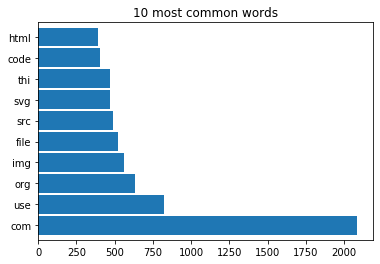

In [26]:
raw_count.sort_values(ascending=False)[0:10].plot.barh(width=.9)
plt.title('10 most common words')

In [27]:
# type(raw_count)

tf_df = pd.DataFrame({'raw_count': raw_count})

tf_df = tf_df.assign(frequency = lambda df: df.raw_count / df.raw_count.sum())

tf_df = tf_df.assign(augmented_frequency = lambda df: df.frequency / df.frequency.max())

tf_df.frequency.max()

tf_df.head()

,raw_count,frequency,augmented_frequency
com,2085,0.025751,1.000000
use,821,0.010140,0.393765
org,635,0.007843,0.304556
img,558,0.006892,0.267626
file,520,0.006422,0.249400


In [28]:
tf_df = (pd.DataFrame({'raw_count': raw_count})
         .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
         .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

tf_df.head(10)

,raw_count,frequency,augmented_frequency
com,2085,0.025751,1.000000
use,821,0.010140,0.393765
org,635,0.007843,0.304556
img,558,0.006892,0.267626
file,520,0.006422,0.249400
src,489,0.006039,0.234532
svg,470,0.005805,0.225420
thi,467,0.005768,0.223981
code,401,0.004953,0.192326
html,394,0.004866,0.188969


Text(0.5, 1.0, 'IDF for a given word')

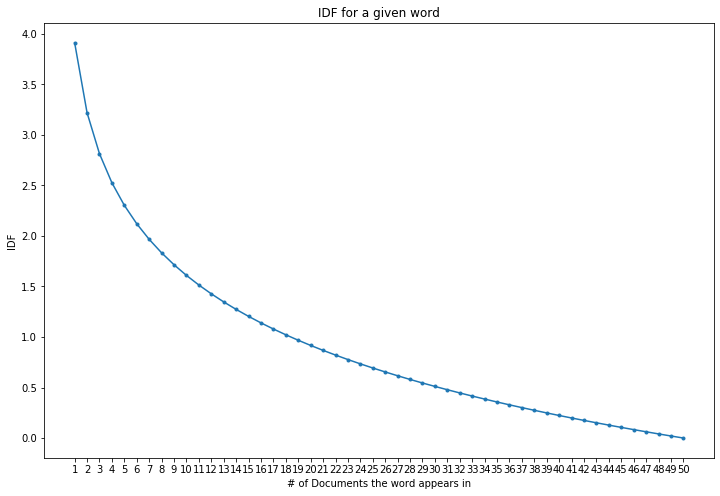

In [29]:
n_documents = 50

x_denominator = np.arange(1, n_documents + 1)
y_idf = np.log(n_documents / x_denominator)

plt.figure(figsize=(12, 8))
plt.plot(x_denominator, y_idf, marker='.')

plt.xticks(x_denominator)
plt.xlabel('# of Documents the word appears in')
plt.ylabel('IDF')
plt.title('IDF for a given word')

In [30]:
print("word: com")
denom = sum([1 for doc in df.cleaned if 'com' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: com
# of occurrences:  98
# of documents:  100
idf =  0.010050335853501506


In [31]:
print("word: use")
denom = sum([1 for doc in df.cleaned if 'use' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: use
# of occurrences:  91
# of documents:  100
idf =  0.083381608939051


In [32]:
print("word: org")
denom = sum([1 for doc in df.cleaned if 'org' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: org
# of occurrences:  82
# of documents:  100
idf =  0.18632957819149354


In [33]:
print("word: img")
denom = sum([1 for doc in df.cleaned if 'img' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: img
# of occurrences:  54
# of documents:  100
idf =  0.5978370007556204


In [34]:
print("word: file")
denom = sum([1 for doc in df.cleaned if 'file' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: file
# of occurrences:  66
# of documents:  100
idf =  0.40047756659712536


In [35]:
print("word: src")
denom = sum([1 for doc in df.cleaned if 'src' in doc])
print("# of occurrences: ", denom)
num = len(df.cleaned)
print("# of documents: ", num)
idf = np.log(num/(denom+1))
print("idf = ", idf)

word: src
# of occurrences:  38
# of documents:  100
idf =  0.9416085398584451


In [36]:
def idf(word):
    n_occurrences = sum([1 for doc in df.cleaned if word in doc])
    n_docs = len(df.cleaned)
    idf = np.log(n_docs/n_occurrences)
    return idf

In [37]:
unique_words = pd.Series(' '.join(df.cleaned).split()).unique()

In [38]:
unique_words

array(['aidungeon', 'model', 'dungeon', ..., 'healthi', 'downstream',
       'schema'], dtype=object)

In [39]:
words = pd.DataFrame(dict(word = unique_words))
words.head()

,word
0,aidungeon
1,model
2,dungeon
3,temporarili
4,unavail


In [40]:
words = words.assign(idf = lambda word: words.word.apply(idf))
words.head()

,word,idf
0,aidungeon,4.605170
1,model,2.302585
2,dungeon,4.605170
3,temporarili,4.605170
4,unavail,4.605170


In [41]:
words.set_index('word').head()

,idf
word,
aidungeon,4.605170
model,2.302585
dungeon,4.605170
temporarili,4.605170
unavail,4.605170


In [42]:
words.sort_values(by='idf', ascending=False).head()

,word,idf
0,aidungeon,4.60517
6842,prereleas,4.60517
6839,abootstrap,4.60517
6840,atmospherej,4.60517
3513,acut,4.60517


In [43]:
len(unique_words)

8303

In [44]:
# try with language
# try with top 25 words

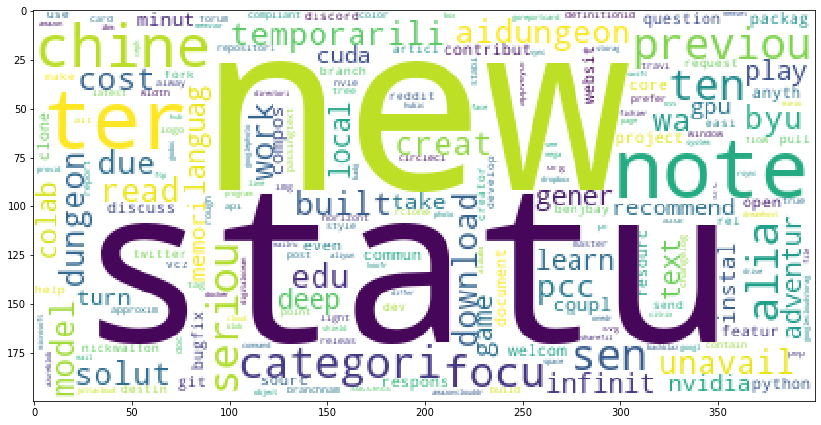

In [54]:
all_cloud = WordCloud(background_color='white').generate(' '.join(unique_words))
plt.figure(figsize=(14, 8))
plt.imshow(all_cloud)

### Modeling

In [46]:
documents = df.cleaned.to_dict()

In [47]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(documents.values())

In [48]:
features_df = pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())
features_df.head()

,aaa,aaaaaa,aac,aacecc,aaf,aaojmf,aardvark,aaron,ab,aba,...,zram,zrzmjddxrve,zsol,zsolt,zulip,zulipchat,zurb,zuul,zvrw,zxuypkodwof
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
X = tfidf.fit_transform(df.cleaned)
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

**Logistic Regression**

In [50]:
lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [51]:
train.head()

,actual,predicted
35,Go,Go
88,JavaScript,JavaScript
19,TypeScript,JavaScript
29,Python,Python
31,Python,Python


In [52]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 70.00%
---
Confusion Matrix
actual      C  C#  C++  CSS  Clojure  Go  HTML  Haskell  Java  JavaScript  \
predicted                                                                   
CSS         0   0    0    8        0   0     0        0     0           0   
Go          0   0    0    0        0   7     0        0     0           0   
JavaScript  1   1    3    0        1   0     4        1     4          19   
Python      0   0    0    0        0   0     0        0     0           0   
Ruby        0   0    0    0        0   0     0        0     0           0   

actual      Jupyter Notebook  Kotlin  PHP  Python  Ruby  Rust  TypeScript  
predicted                                                                  
CSS                        0       0    0       0     0     0           0  
Go                         0       0    0       0     0     0           0  
JavaScript                 1       1    2       0     1     1           3  
Python                     0       0    0 

In [53]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 30.00%
---
Confusion Matrix
actual      C  C++  CSS  CoffeeScript  HTML  Java  JavaScript  \
predicted                                                       
JavaScript  1    1    1             1     1     1           6   

actual      Jupyter Notebook  Python  Ruby  TypeScript  
predicted                                               
JavaScript                 1       5     1           1  
---
                  precision    recall  f1-score   support

               C       0.00      0.00      0.00         1
             C++       0.00      0.00      0.00         1
             CSS       0.00      0.00      0.00         1
    CoffeeScript       0.00      0.00      0.00         1
            HTML       0.00      0.00      0.00         1
            Java       0.00      0.00      0.00         1
      JavaScript       0.30      1.00      0.46         6
Jupyter Notebook       0.00      0.00      0.00         1
          Python       0.00      0.00      0.00         5
          

In [58]:
train.predicted.head()

35            Go
88    JavaScript
19    JavaScript
29        Python
31        Python
Name: predicted, dtype: object

**Decision Tasks:**
- stem vs lemmatize? evaluate df
- finalize regex
- normalize language column

**Explore:**
- ngram
- word clouds
    
**Modeling**
- classification models